In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sys

sys.path.append('..')

In [2]:
from scripts import dataframe as dfr
from scripts import matrix as mx
from scripts import regression as rg

In [3]:
# !wget 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [4]:
housing_df = pd.read_csv('housing.csv')
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot: xlabel='median_house_value', ylabel='Count'>

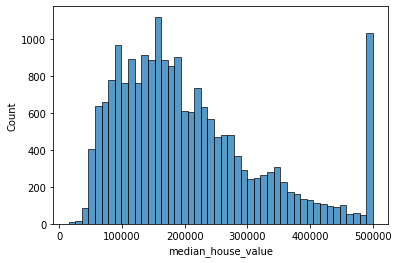

In [5]:
sns.histplot(housing_df.median_house_value)

In [6]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
usefull_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income','median_house_value']

df = housing_df[usefull_cols]

In [8]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [9]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

<h1> Question 1 </h1>

Find a feature with missing values. How many missing values does it have?

<h3> 207 </h3>

In [10]:
df.population.median()

1166.0

<h1> Question 2 </h1>

What's the median (50% percentile) for variable 'population'?

<h3> 1166 </h3>

In [11]:
df_train,df_val,df_test,y_train,y_test,y_val = dfr.train_val_test_split_with_shuffle(df,42,0.2,0.2,'median_house_value')

In [12]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250


In [13]:
df_val.shape

(4128, 8)

In [14]:
df_test.shape

(4128, 8)

In [15]:
y = df.median_house_value.to_numpy()

In [16]:
y_trans = np.log1p(y)
y_trans

array([13.02276622, 12.78968673, 12.77167335, ..., 11.43281025,
       11.34688269, 11.40088715])

<AxesSubplot: ylabel='Count'>

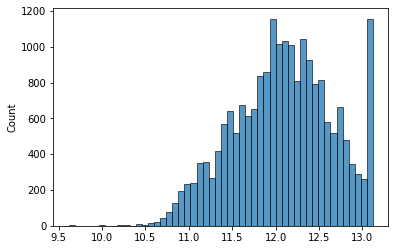

In [17]:
sns.histplot(y_trans,bins=50)

<h1> Felling with zero the missing values </h1>

In [18]:
X_train = df_train.fillna(0).values
X_val = df_val.fillna(0).values
X_test = df_test.fillna(0).values

X_train

array([[-1.1901e+02,  3.6060e+01,  2.5000e+01, ...,  1.3920e+03,
         3.5900e+02,  1.6812e+00],
       [-1.1946e+02,  3.5140e+01,  3.0000e+01, ...,  1.5650e+03,
         5.8400e+02,  2.5313e+00],
       [-1.2244e+02,  3.7800e+01,  5.2000e+01, ...,  1.3100e+03,
         9.6300e+02,  3.4801e+00],
       ...,
       [-1.2091e+02,  3.8980e+01,  1.3000e+01, ...,  3.2640e+03,
         1.1980e+03,  3.6530e+00],
       [-1.1772e+02,  3.4090e+01,  3.6000e+01, ...,  7.8500e+02,
         2.9900e+02,  3.2566e+00],
       [-1.2247e+02,  3.7760e+01,  3.4000e+01, ...,  1.1520e+03,
         4.4500e+02,  5.1893e+00]])

In [19]:
w_all = rg.train_linear_reg(X_train,y_train)

In [20]:
w0 = w_all[0]
w = w_all[1:]

In [21]:
y_val_pred = w0 + X_val.dot(w)

In [22]:
score = rg.rmse(y_val,y_val_pred)
score

0.3295330365225461

In [23]:
round(score,2)

0.33

<h1> Felling with mean the missing values </h1>

In [24]:
X_train_with_mean_filling = df_train.fillna(df_train['total_bedrooms'].mean()).values
X_val_with_mean_filling = df_val.fillna(df_train['total_bedrooms'].mean()).values
X_test_with_mean_filling = df_test.fillna(df_train['total_bedrooms'].mean()).values

In [25]:
w_all = rg.train_linear_reg(X_train_with_mean_filling,y_train)
w0 = w_all[0]
w = w_all[1:]
y_val_pred_with_mean_filling = w0 + X_val_with_mean_filling.dot(w)
score = rg.rmse(y_val,y_val_pred_with_mean_filling)
round(score,2)

0.33

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

<h3> They are the same </h3>

In [30]:
r_list = [ 0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [31]:
rg.show_training_results_with_regularization(X_train,X_val,y_train,y_val,r_list)

0 -11.686975241722367 0.33
1e-06 -11.686959175597698 0.33
0.0001 -11.685368865326225 0.33
0.001 -11.670931317790998 0.33
0.01 -11.528493585934847 0.33
0.1 -10.27450028213499 0.33
1 -4.920480897663232 0.33
5 -1.4820957456380226 0.34
10 -0.7899311832160492 0.34


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:
- 0
- 0.000001
- 0.001
- 0.0001

<h3> 0.000001 </h3>

In [36]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
score_dict = {}
score_list = []

In [37]:
for seed in seeds:
    df_train_new,df_val_new,df_test_new,y_train_new,y_test_new,y_val_new = dfr.train_val_test_split_with_shuffle(
        df,
        seed,
        0.2,
        0.2,
        'median_house_value'
        )
    X_train_new = df_train_new.fillna(0).values
    X_val_new = df_val_new.fillna(0).values
    X_test_new = df_test_new.fillna(0).values

    w_all = rg.train_linear_reg(X_train_new,y_train_new)
    w0 = w_all[0]
    w = w_all[1:]
    y_val_pred_new = w0 + X_val_new.dot(w)
    score = rg.rmse(y_val_new,y_val_pred_new)
    score_dict[seed] = round(score,2)
    score_list.append(round(score,2))


In [39]:
score_dict

{0: 0.34,
 1: 0.34,
 2: 0.33,
 3: 0.34,
 4: 0.34,
 5: 0.34,
 6: 0.35,
 7: 0.34,
 8: 0.35,
 9: 0.34}

In [40]:
round(np.std(score_list),3)

0.005

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.
Options:
- 0.16
- 0.00005
- 0.005
- 0.15555

<h3> 0.005 </h3>

In [41]:
df_train_last,df_val_last,df_test_last,y_train_last,y_test_last,y_val_last = dfr.train_val_test_split_with_shuffle(df,9,0.2,0.2,'median_house_value')

In [43]:
df_full_train = pd.concat([df_train_last,df_val_last])
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = np.concatenate([y_train_last,y_val_last])
X_full_train = df_full_train.fillna(0).values
X_test_last = df_test_last.fillna(0).values

In [46]:
w_all = rg.train_linear_reg_regularized(X_full_train,y_full_train,0.001)
w0 = w_all[0]
w = w_all[1:]
y_pred= w0 + X_test_last.dot(w)
score = rg.rmse(y_test_last,y_pred)
round(score,2)

0.35

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:
- 0.35
- 0.135
- 0.450
- 0.245

<h3> 0.35 </h3>